In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import pickle

In [2]:
names = ['ID', 'Xcor','Ycor', 'F606','eF606','F814','eF814','chi','sharp']
df_stars = pd.read_csv('../Data/hlsp_deep47tuc_hst_acs_47tuc_f606w-f814w_v1_catalog.txt', 
                      names=names, delim_whitespace=True, skiprows=1)

df_stars['Label'] = 0
df_stars.loc[df_stars.sharp < 0, 'Label'] = -1
df_stars.loc[df_stars.sharp > 0, 'Label'] = 1

df_stars.head()

,ID,Xcor,Ycor,F606,eF606,F814,eF814,chi,sharp,Label
0,8,4462.947,140.859,28.197,0.1036,27.127,0.1068,6.106,0.7310,1
1,120,5002.486,186.138,20.843,0.0552,19.815,0.0661,10.690,0.4000,1
2,165,5003.574,195.421,27.014,0.2194,26.068,0.1349,10.651,0.1940,1
3,226,4448.493,207.417,30.193,0.3641,28.270,0.1636,4.059,-1.9585,-1
4,351,5040.717,224.366,28.935,0.1669,28.941,0.2464,4.274,-0.7720,-1


# Visualize Data

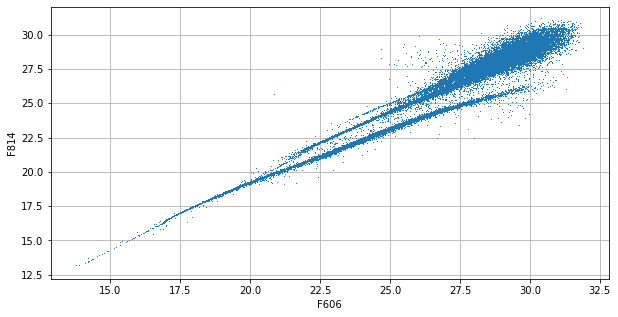

In [3]:
plt.figure(figsize=(10,5))
plt.plot(df_stars.F606, df_stars.F814, ',')
plt.xlabel('F606')
plt.ylabel('F814')
plt.grid()

# Splitting the dataset into train and test samples 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale

x_preprocessed = minmax_scale(X=df_stars.iloc[:, :-2].values)
x_train, x_test, y_train, y_test = train_test_split(x_preprocessed, df_stars.Label.values)

# Random Forest Classifier

In [5]:
from sklearn.ensemble import ExtraTreesClassifier



ExtraTreesClassifier(n_estimators=800)

In [6]:
importances = model_DT.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_DT.estimators_], axis=0)

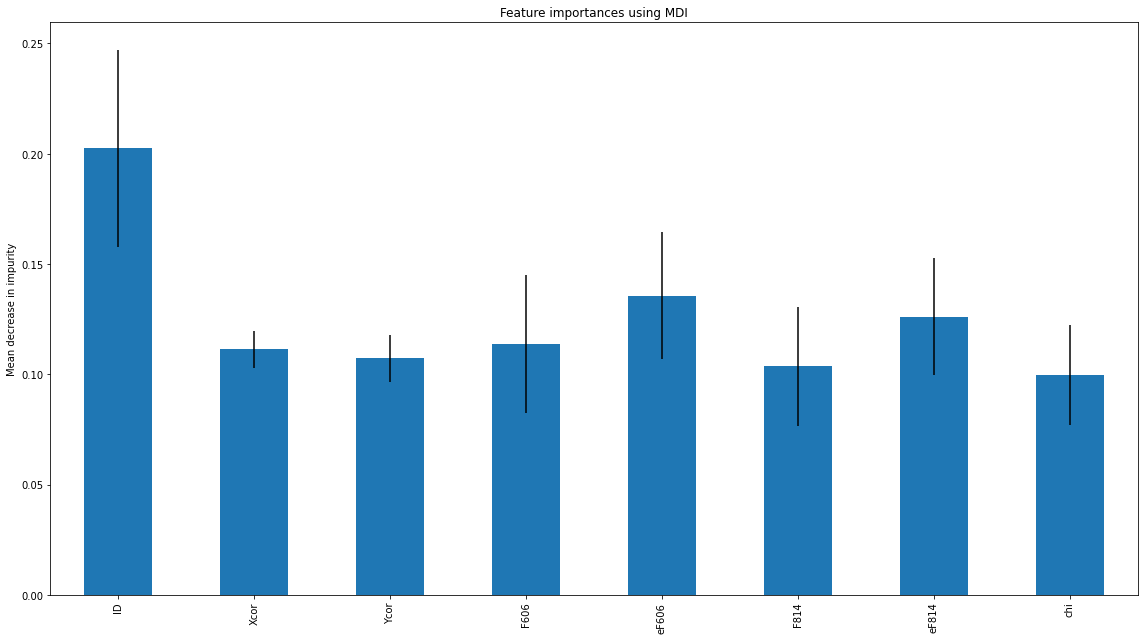

In [7]:
forest_importances = pd.Series(importances, index=df_stars.columns[:-2])

fig, ax = plt.subplots(figsize=(16,9))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# Grid Search and Cross Validation process
## Decision Tree Grid Search

In [27]:
%%time 

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

if not(os.path.isfile("../Model_best_parameters/best_parameters_DT.p")):
    grid_param_DT = {'n_estimators': [100, 300, 500, 800, 1000],
                     'criterion': ['gini', 'entropy']
                    }

    gs_src_DT = GridSearchCV(estimator=model_DT, 
                 param_grid=grid_param_DT,
                 scoring='accuracy',
                 cv=10,
                 n_jobs=-1)

    gs_src_DT.fit(x_train, y_train)
    best_parameters = gs_src_DT.best_params_
    
    pickle.dump(best_parameters, open("../Model_best_parameters/best_parameters_DT.p", "wb"))
else:
    DT_param = pickle.load(open("../Model_best_parameters/best_parameters_DT.p", 'rb'))
    print("param loaded")
    
    model_DT = ExtraTreesClassifier(**DT_param)
    model_DT.fit(X=x_train, y=y_train)

param loaded
CPU times: user 21.9 s, sys: 1.53 s, total: 23.4 s
Wall time: 23.4 s


## Support Vector Classifier Grid Search

In [25]:
%%time 

from sklearn.svm import SVC
from sklearn.metrics import classification_report

if not(os.path.isfile("../Model_best_parameters/best_parameters_svm.p")):
    grid_param_SVM = {'C': [0.1, 1, 10, 100],
                      'kernel': ['poly', 'rbf']
                     }

    model_SVM = SVC(class_weight='balanced')


    gs_src_svm = GridSearchCV(estimator=model_SVM, 
                 param_grid=grid_param_SVM,
                 scoring='accuracy',
                 cv=10,
                 n_jobs=-1)

    gs_src_svm.fit(x_train, y_train)
    
    best_parameters_SVM = gs_src_svm.best_params_
    best_parameters_SVM
    
    pickle.dump(best_parameters, open("../Model_best_parameters/best_parameters_svm.p", "wb"))
else: 
    SVM_param = pickle.load(open("../Model_best_parameters/best_parameters_svm.p", "rb"))
    print("param loaded")
    
    model_SVM = SVC(**SVM_param, class_weight='balanced')
    model_SVM.fit(X=x_train, y=y_train)

param loaded
CPU times: user 1min 5s, sys: 281 ms, total: 1min 5s
Wall time: 1min 5s
